Lilianna Houston

Updated: 9/9/21

Gillespie Simulation 

Max Entropy Project

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random

Basic Gillespie Simulation: We have two different reactions, A->B and B->A with rates k_f and k_b respectively. At time t = 0, we have n_a and n_b number of A and B molecules. The probability of each reaction, combined with a random reaction and random time variable, determine which reaction happens, when. As time progresses, the numbers of A and B molecules flucuate; sometimes forming a pattern.

## Example 3: Toggle Switch

In this example, we have 16 reactions. a1/a2) a mRNA production, degradation, a3/a4) protein A production/degradation, a5/a6) a star production, degradation, a7) a star a mRNA production, a8) a star b mRNA production, b1/b2) b mRNA production, degradation, b3/b4) protein B production/degradation, b5/b6) a prime production, degradation, b7) a prime a mRNA production, a8) a prime b mRNA production  

In [23]:
# CONSTANTS
# d = mRNA degradation rate
d = 0.5 # 1/s
# p = mRNA protein production rate
p = 0.02 # 1/s
# f = mRNA/protein forward state production rate
f = 3.5*10**(-6) # 1/s
# b = mRNA/protein backward state degradation rate
b = 2.0*10**(-5) # 1/s
# g = state production of matching mRNA production rate
g = 0.5 # 1/s
# g_state = state production of opposite mRNA production rate
g_star = 2.5*10**(-3) # 1/s
# protein degradation rate
r = 1.0*10**(-3) # 1/s

In [34]:
# INITIAL CONDITION of CHANGING VARIABLES

Apro = []
Bpro = []
times = []

# number of basic gene
n_g = 1
# number of star gene
n_g_s = 0
# number of prime gene
n_g_p = 0

# number of a mRNA
mR_a = 0
# number of b mRNA
mR_b = 0

# Number of A proteins
n_a = 0
# Number of B proteins
n_b = 0

base_time = 0

main()

In [33]:
def main():
    global base_time, n_g, n_g_s, n_g_p, mR_a, mR_b, n_a, n_b
    
    i = 0
    while base_time < 10**6:
        # Random reaction variable
        rand_r = random.uniform(0, 1)
        # Random time variable
        rand_t = random.uniform(0, 1) 
        
        # Propensities
        # a1) a mRNA production
        a1 = n_g * g
        # a2) a mRNA degradation
        a2 = mR_a * d
        # a3) protein A production
        a3 = mR_a * p
        # a4) protein A degradation 
        a4 = n_a * r
        # a5) a star production
        a5 = n_g * n_a * f
        # a6) a star degradation
        a6 = n_g_s * b
        # a7) a star a mRNA production
        a7 = n_g_s * g
        # a8) a star b mRNA production
        a8 = n_g_s * g_star
        
        # b1) a mRNA production
        b1 = n_g * g
        # b2) a mRNA degradation
        b2 = mR_b * d
        # b3) protein A production
        b3 = mR_b * p
        # b4) protein A degradation 
        b4 = n_b * r
        # b5) a star production
        b5 = n_g * n_b * f
        # b6) a star degradation
        b6 = n_g_p * b
        # b7) a star a mRNA production
        b7 = n_g_p * g_star
        # b8) a star b mRNA production
        b8 = n_g_p * g
        
        # Def vector of propensities
        props = np.array([a1, a2, a3, a4, a5, a6, a7, a8,
                          b1, b2, b3, b4, b5, b6, b7, b8])
        # Def vector of probabilities
        probs = props/np.sum(props) 
        # Calculate random time
        time = 1/(np.sum(props))*np.log(1/rand_t)
        base_time += time
        
        react = deter_reaction(rand_r, probs)
        
        if react != 0:
            reaction_switch(react)
        #print ("i:", i, "unactive gene:", n_g_ua, "active gene:", n_g_a, "proteins:", n_a, "dimers:", n_a2)        
        Apro.append(n_a)
        Bpro.append(n_b)
        times.append(base_time)
        i += 1
        
    #print ("proteins:", Apro, Bpro)
    #print ("base_time:", times)

In [7]:
# Probability Generator (useless tbh)
def prob_gen(prop):
    p = props[prop - 1] / np.sum(props)
    return (p)

In [6]:
# Reaction Selector 
def deter_reaction(rand_r, probs):
    c = 0
    s = 0
    while c < (len(probs) + 1):
        if s > rand_r:
            return c
        else:
            s += probs[c]
            c += 1
    return 0

In [5]:
def reaction_switch(react):
    global n_g, n_g_s, n_g_p, mR_a, mR_b, n_a, n_b

    if react == 1:
        mR_a += 1
    elif react == 2:
        mR_a -= 1
    elif react == 3:
        n_a += 1
    elif react == 4:
        n_a -= 1
    elif react == 5:
        n_g_s += 1
        n_g -= 1
        n_a -= 1
    elif react == 6:
        n_g_s -= 1
        n_g += 1
        n_a += 1
    elif react == 7:
        mR_a += 1
    elif react == 8:
        mR_b += 1
        
    elif react == 9:
        mR_b += 1
    elif react == 10:
        mR_b -= 1
    elif react == 11:
        n_b += 1
    elif react == 12:
        n_b -= 1
    elif react == 13:
        n_g_p += 1
        n_g -= 1
        n_b -= 1
    elif react == 14:
        n_g_p -= 1
        n_g += 1
        n_b += 1
    elif react == 15:
        mR_a += 1
    elif react == 16:
        mR_b += 1

C:\Users\lilia\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


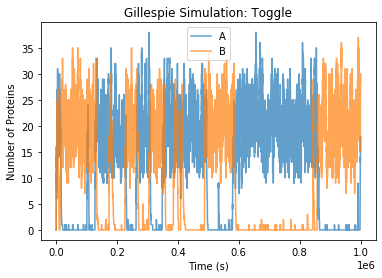

In [35]:
# plot
plt.plot(times, Apro, alpha=.7, label="A")
plt.plot(times, Bpro, alpha=.7, label="B")

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Time (s)")
plt.ylabel("Number of Proteins")
plt.title("Gillespie Simulation: Toggle")
plt.legend()
plt.show()

In [68]:
import seaborn as sns
from numpy import linspace, meshgrid

In [66]:
max_pro = max(np.max(Apro), np.max(Bpro)) + 1

heat_array = np.zeros((max_pro, max_pro))

for i in range(len(Apro)):
    heat_array[Apro[i], Bpro[i]] += 1

In [67]:
print (heat_array)

[[ 69.   0.   0. ...  98.  36.   0.]
 [ 38.   0.   0. ... 125.   7.   0.]
 [ 57.   0.   0. ...   0.   0.   0.]
 ...
 [ 21. 175.   0. ...   0.   0.   0.]
 [ 41.   0.   0. ...   0.   0.   0.]
 [ 42.   0.   0. ...   0.   0.   0.]]


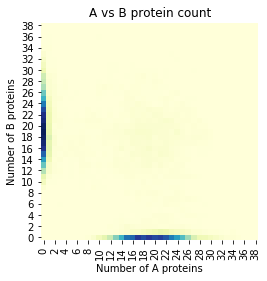

In [106]:
fig, ax = plt.subplots()
ax.set_title("A vs B protein count")

ax = sns.heatmap(heat_array, cmap="YlGnBu", cbar=False, square=True)
ax.set_xlabel("Number of A proteins")
ax.set_ylabel("Number of B proteins")
ax.invert_yaxis()

In [ ]:
#